In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as splt


In [ ]:
df = pd.read_excel('/content/Dataset.xlsx')
df

**LabelEncoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df['Gender']= le.fit_transform(df['Gender'])
df['Frequency']= le.fit_transform(df['Frequency'])
df['Salience']= le.fit_transform(df['Salience'])
df['Tolerance']= le.fit_transform(df['Tolerance'])
df['MoodModification']= le.fit_transform(df['MoodModification'])
df['Withdrawl']= le.fit_transform(df['Withdrawl'])
df['Relapse']= le.fit_transform(df['Relapse'])
df['Conflict']= le.fit_transform(df['Conflict'])
df['Problems']= le.fit_transform(df['Problems'])
df['Opinion']= le.fit_transform(df['Opinion']) 
df['Class']= le.fit_transform(df['Class'])
df

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# a = {'M': 1, 'F': 0}
# df['Sex'] = df['Sex'].map(a)

# b = {'ASY': 3, 'ATA': 2, 'NAP': 1, 'TA': 0}
# df['ChestPainType'] = df['ChestPainType'].map(b)

# c = {'LVH': 2, 'Normal': 1, 'ST': 0}
# df['RestingECG'] = df['RestingECG'].map(c)

# d = {'N': 1, 'Y': 0}
# df['ExerciseAngina'] = df['ExerciseAngina'].map(d)

# e = {'Down': 2, 'Flat': 1, 'Up': 0}
# df['ST_Slope'] = df['ST_Slope'].map(e)

In [ ]:
features=['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']
x=df[features]
y=df.Class

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
 
predictions = logreg.predict(x_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[ 1.04785236 -0.07883529 -0.18639278  0.03143129 -0.22788486 -0.14220208
  -0.12664703  0.02598898  0.51980326 -0.51985094  0.60200225]]
Intercept: [0.27756397]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       105
           1       0.71      0.36      0.48        33

    accuracy                           0.81       138
   macro avg       0.77      0.66      0.68       138
weighted avg       0.80      0.81      0.79       138

Confusion Matrix:
 [[100   5]
 [ 21  12]]
Accuracy Score: 0.8115942028985508
Precision: 0.7058823529411765
Recall: 0.36363636363636365


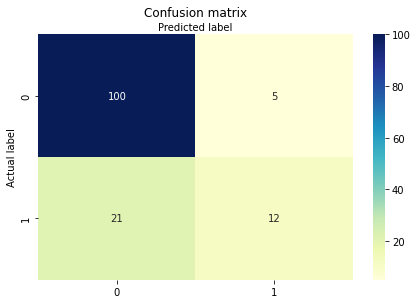

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = splt.subplots()
tick_marks = np.arange(len(class_names))
splt.xticks(tick_marks, class_names)
splt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
splt.tight_layout()
splt.title('Confusion matrix', y=1.1)
splt.ylabel('Actual label')
splt.xlabel('Predicted label')
splt.show()

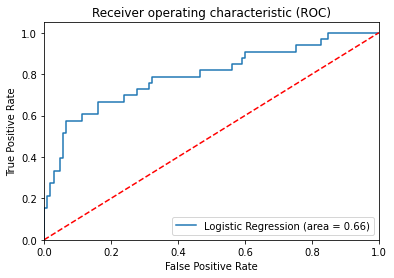

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
splt.figure()
splt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
splt.plot([0, 1], [0, 1],'r--')
splt.xlim([0.0, 1.0])
splt.ylim([0.0, 1.05])
splt.xlabel('False Positive Rate')
splt.ylabel('True Positive Rate')
splt.title('Receiver operating characteristic (ROC)')
splt.legend(loc="lower right")
splt.savefig('Log_ROC')
splt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [ ]:
model1=GaussianNB()
model1.fit(x_train,y_train)

GaussianNB()

In [ ]:
predictions = model1.predict(x_test)

In [ ]:
print('Classification Report:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       105
           1       0.60      0.64      0.62        33

    accuracy                           0.81       138
   macro avg       0.74      0.75      0.75       138
weighted avg       0.82      0.81      0.81       138

Confusion Matrix:
 [[91 14]
 [12 21]]
Accuracy Score: 0.8115942028985508
Precision: 0.6
Recall: 0.6363636363636364


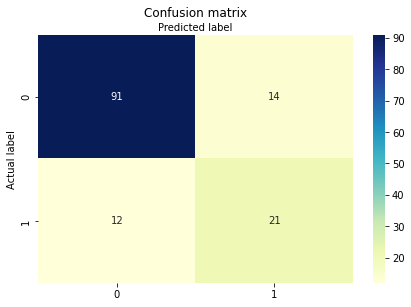

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = splt.subplots()
tick_marks = np.arange(len(class_names))
splt.xticks(tick_marks, class_names)
splt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
splt.tight_layout()
splt.title('Confusion matrix', y=1.1)
splt.ylabel('Actual label')
splt.xlabel('Predicted label')
splt.show()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = range(1,12)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8260869565217391, 0.8115942028985508, 0.8188405797101449, 0.8115942028985508, 0.8260869565217391, 0.8333333333333334, 0.8188405797101449, 0.8115942028985508, 0.8043478260869565, 0.8043478260869565, 0.7971014492753623]


Text(0, 0.5, 'Testing Accuracy')

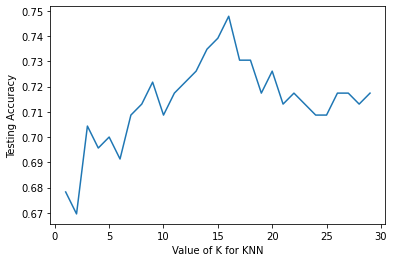

In [ ]:
splt.plot(k_range, scores)
splt.xlabel('Value of K for KNN')
splt.ylabel('Testing Accuracy')

In [ ]:
k = 15
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=15)

In [ ]:
predictions = neigh.predict(x_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       105
           1       0.86      0.18      0.30        33

    accuracy                           0.80       138
   macro avg       0.83      0.59      0.59       138
weighted avg       0.81      0.80      0.74       138

Confusion Matrix:
 [[104   1]
 [ 27   6]]
Accuracy Score: 0.7971014492753623


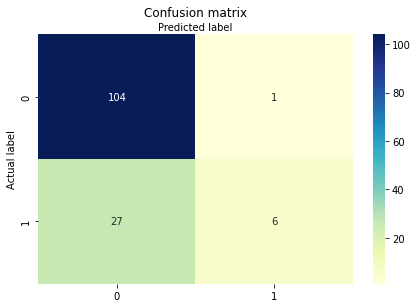

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = splt.subplots()
tick_marks = np.arange(len(class_names))
splt.xticks(tick_marks, class_names)
splt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
splt.tight_layout()
splt.title('Confusion matrix', y=1.1)
splt.ylabel('Actual label')
splt.xlabel('Predicted label')
splt.show()

**Decision Tree**

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#split dataset in features and target variable
feature_cols = ['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']
X = df[feature_cols] # Features
y = df.Class # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8727272727272727


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102  11]
 [ 10  42]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       113
           1       0.79      0.81      0.80        52

    accuracy                           0.87       165
   macro avg       0.85      0.86      0.85       165
weighted avg       0.87      0.87      0.87       165



In [ ]:
!pip install graphviz 
!pip install pydotplus
!pip install --upgrade scikit-learn==0.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 23.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


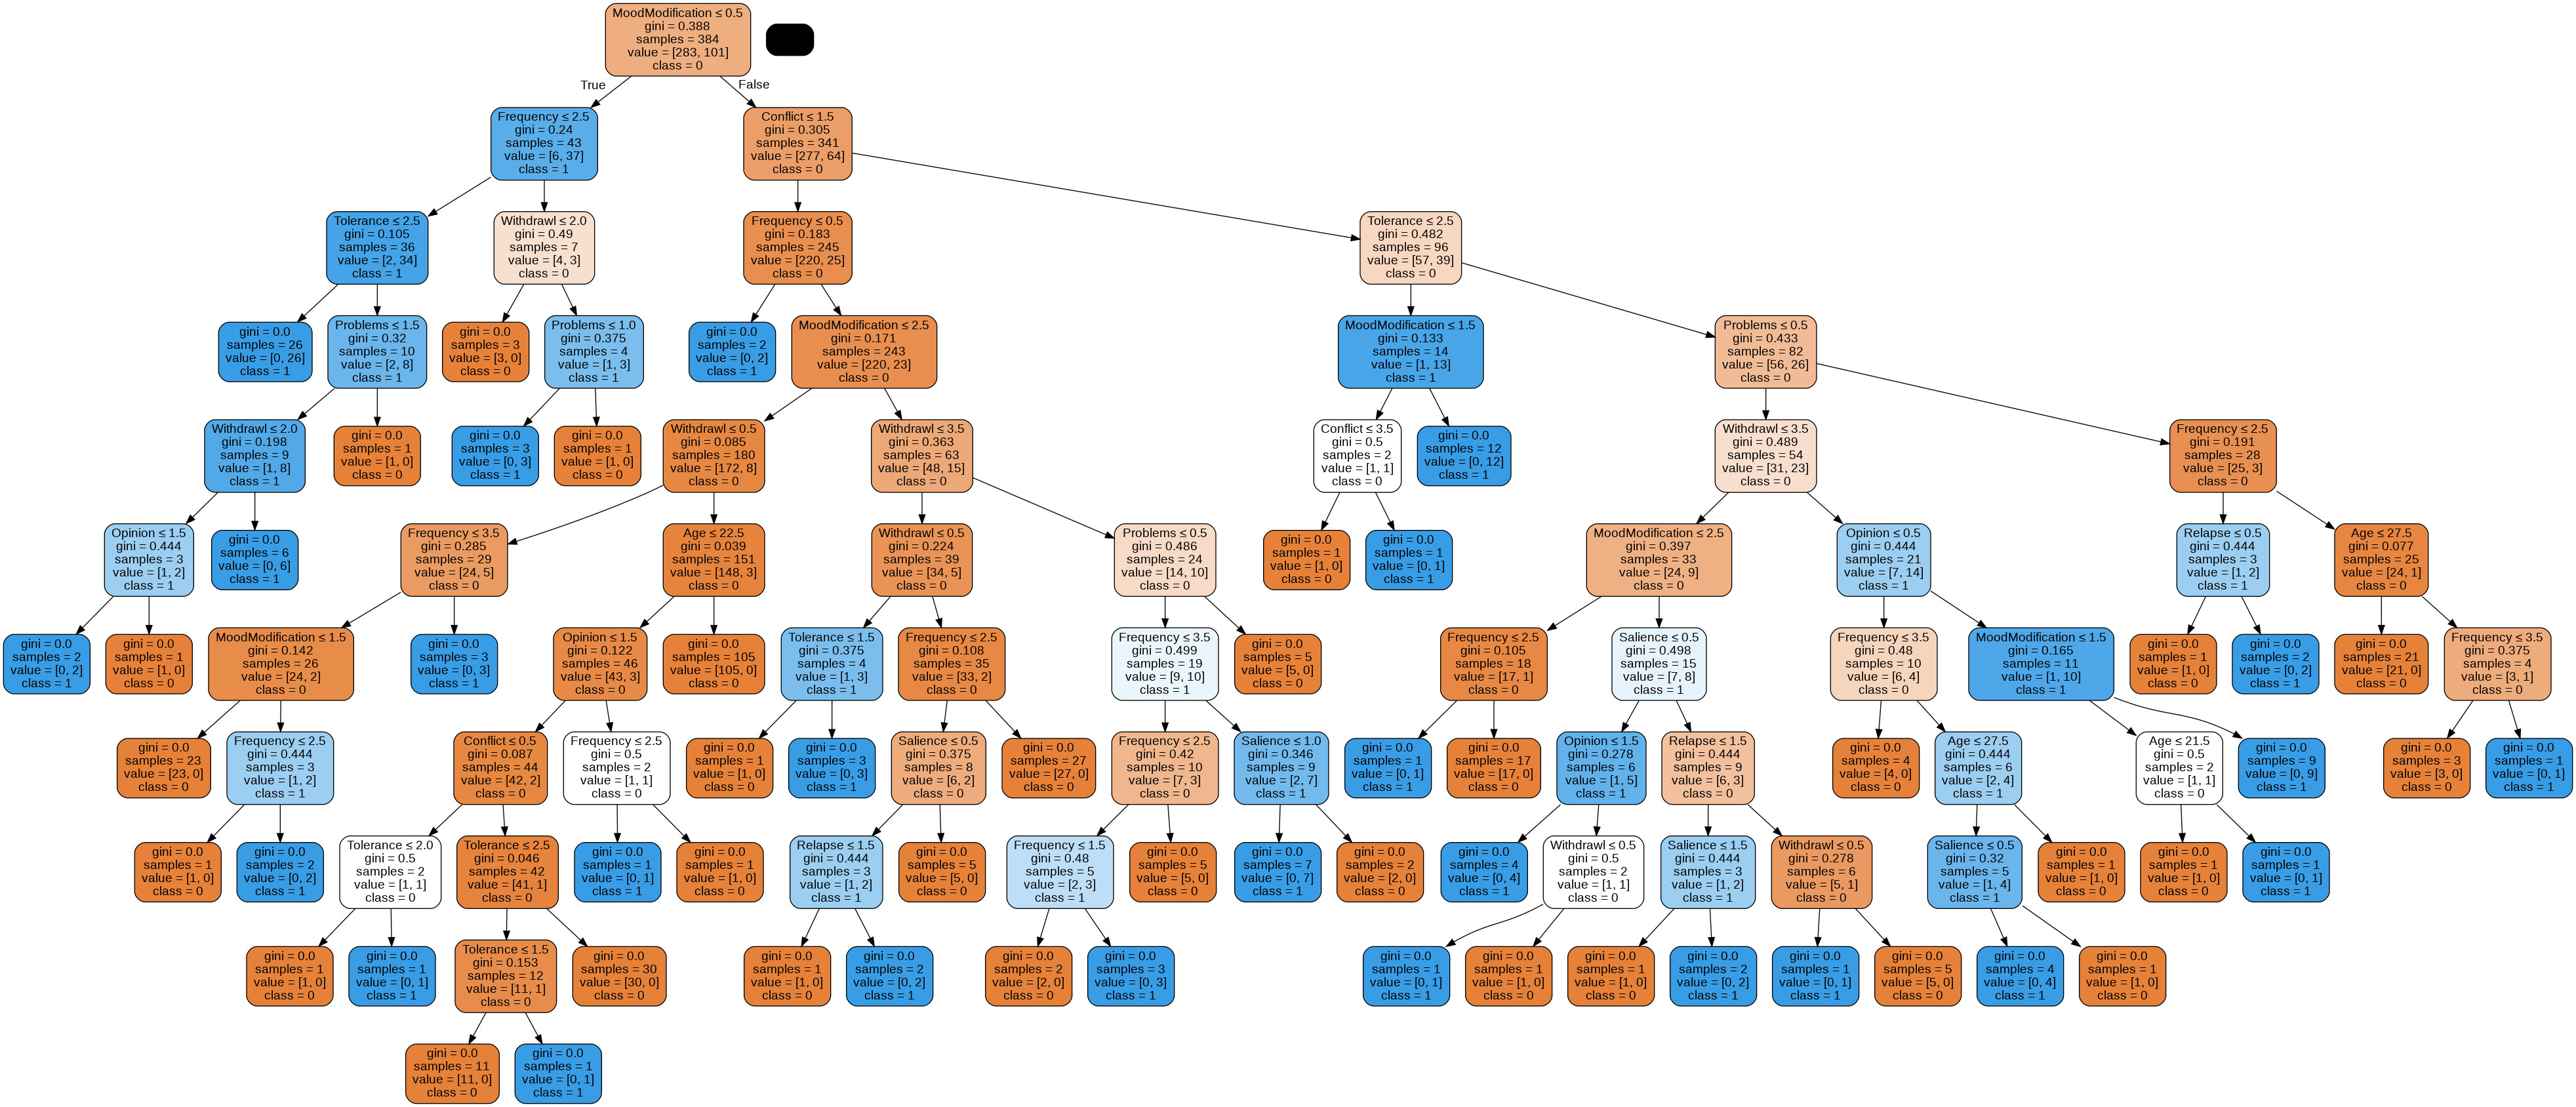

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('HeartDisease.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8303030303030303


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[110   3]
 [ 25  27]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89       113
           1       0.90      0.52      0.66        52

    accuracy                           0.83       165
   macro avg       0.86      0.75      0.77       165
weighted avg       0.84      0.83      0.82       165



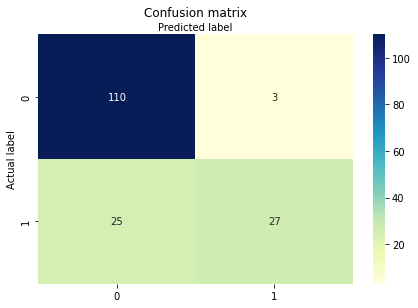

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = splt.subplots()
tick_marks = np.arange(len(class_names))
splt.xticks(tick_marks, class_names)
splt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred2)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
splt.tight_layout()
splt.title('Confusion matrix', y=1.1)
splt.ylabel('Actual label')
splt.xlabel('Predicted label')
splt.show()

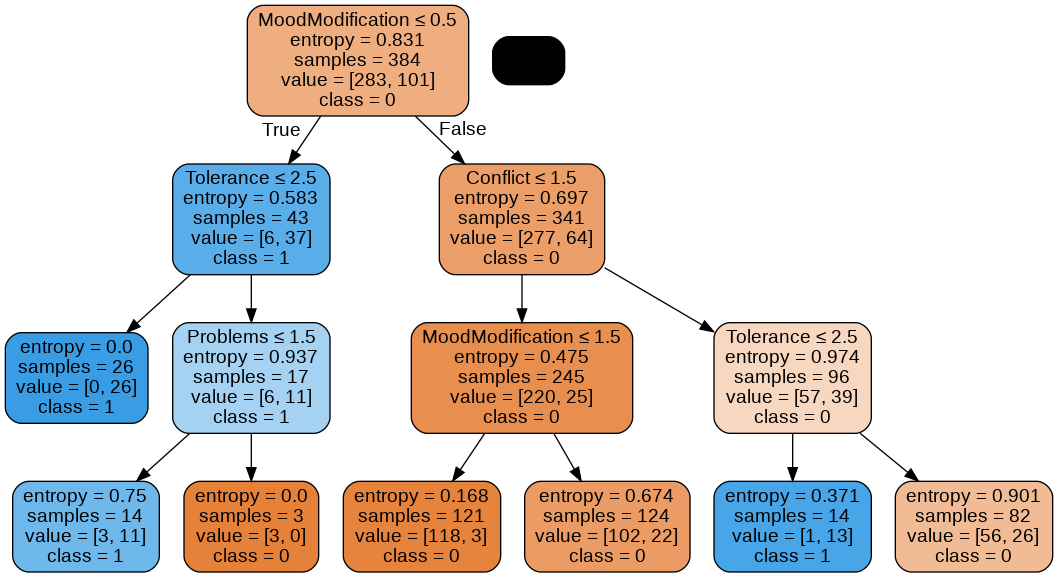

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('HeartDisease2.png')
Image(graph.create_png())

**Random Forest**

In [ ]:
!pip install -U scikit-learn==0.21.3
!pip install -U scikit-learn==0.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 35.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.21.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 17.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22 which is incompatible.


In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
feature_cols = ['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']
X = df[feature_cols] # Features
y = df['Class'] # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_pred3=rf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9030303030303031


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[107   6]
 [ 10  42]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       113
           1       0.88      0.81      0.84        52

    accuracy                           0.90       165
   macro avg       0.89      0.88      0.89       165
weighted avg       0.90      0.90      0.90       165



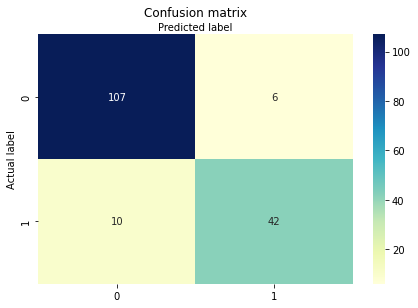

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = splt.subplots()
tick_marks = np.arange(len(class_names))
splt.xticks(tick_marks, class_names)
splt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred3)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
splt.tight_layout()
splt.title('Confusion matrix', y=1.1)
splt.ylabel('Actual label')
splt.xlabel('Predicted label')
splt.show()

**Finding Important Features in Scikit-learn**

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
rf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_cols, rf.feature_importances_):
    print(feature)

('Gender', 0.012026771430723511)
('Age', 0.07591456698292422)
('Frequency', 0.1547236675016248)
('Salience', 0.04845505752910548)
('Tolerance', 0.14291114875952768)
('MoodModification', 0.19825578903154858)
('Withdrawl', 0.10023640306648517)
('Relapse', 0.05765530698501516)
('Conflict', 0.12549203479654245)
('Problems', 0.04040838458310993)
('Opinion', 0.04392086933339303)


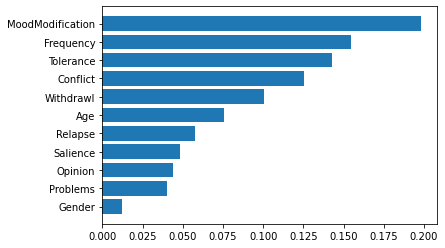

In [ ]:
f_i = list(zip(feature_cols,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
splt.barh([x[0] for x in f_i],[x[1] for x in f_i])

splt.show()

**SVM**

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
feature_cols = ['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']
X = df[feature_cols] # Features
y = df['Class'] # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
svc = svm.SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
sv_pred=svc.predict(X_test)
print(classification_report(y_test, sv_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, sv_pred)))
print(confusion_matrix(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        72
           1       0.00      0.00      0.00        38

    accuracy                           0.65       110
   macro avg       0.33      0.50      0.40       110
weighted avg       0.43      0.65      0.52       110


Accuracy: 0.6545
[[72  0]
 [38  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


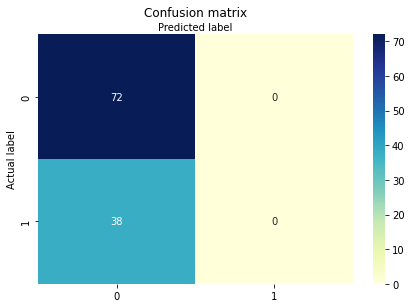

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = splt.subplots()
tick_marks = np.arange(len(class_names))
splt.xticks(tick_marks, class_names)
splt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, sv_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
splt.tight_layout()
splt.title('Confusion matrix', y=1.1)
splt.ylabel('Actual label')
splt.xlabel('Predicted label')
splt.show()

**Adaptive Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
feature_cols = ['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']
X = df[feature_cols] # Features
y = df['Class'] # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
model = AdaModel.fit(X_train, y_train)

In [ ]:
ada_pred = AdaModel.predict(X_test)
print('Classification Report:\n',classification_report(y_test, ada_pred))
print('Accuracy Score:',accuracy_score(y_test, ada_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       113
           1       0.89      0.90      0.90        52

    accuracy                           0.93       165
   macro avg       0.92      0.93      0.92       165
weighted avg       0.93      0.93      0.93       165

Accuracy Score: 0.9333333333333333


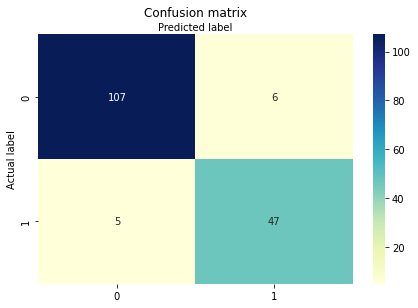

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = splt.subplots()
tick_marks = np.arange(len(class_names))
splt.xticks(tick_marks, class_names)
splt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, ada_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
splt.tight_layout()
splt.title('Confusion matrix', y=1.1)
splt.ylabel('Actual label')
splt.xlabel('Predicted label')
splt.show()

**Gradient Boosting**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
feature_cols = ['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']
X = df[feature_cols] # Features
y = df['Class'] # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
gradientregressor = GradientBoostingRegressor(n_estimators=100,learning_rate=1.0)
model = gradientregressor.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions = gradientregressor.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions.round()))
print('Accuracy Score:',accuracy_score(y_test, predictions.round()))
# print('Accuracy Score:',accuracy_score(y_test, grad_pred))

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.87      0.93      0.90       112
         1.0       0.86      0.68      0.76        53
         2.0       0.00      0.00      0.00         0

    accuracy                           0.85       165
   macro avg       0.43      0.40      0.41       165
weighted avg       0.86      0.85      0.85       165

Accuracy Score: 0.8484848484848485


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


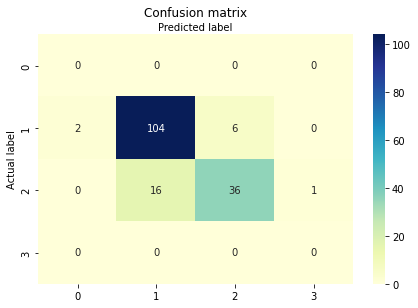

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = splt.subplots()
tick_marks = np.arange(len(class_names))
splt.xticks(tick_marks, class_names)
splt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions.round())), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
splt.tight_layout()
splt.title('Confusion matrix', y=1.1)
splt.ylabel('Actual label')
splt.xlabel('Predicted label')
splt.show()

**Feature Importance with Gradient Boosting**

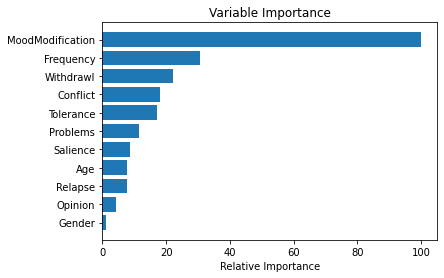

In [ ]:
feature_importance = model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
splt.barh(pos, feature_importance[sorted_idx], align='center')
splt.yticks(pos,X.columns[sorted_idx])
splt.xlabel('Relative Importance')
splt.title('Variable Importance')
splt.show()

**XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
feature_cols = ['Gender','Age','Frequency','Salience','Tolerance','MoodModification','Withdrawl','Relapse','Conflict','Problems','Opinion']
X = df[feature_cols] # Features
y = df['Class'] # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',gamma=0,colsample_bytree = .5,num_boost_round=100,   learning_rate = 1,scale_pos_weight = 1)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[21:36:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('Classification Report:\n',classification_report(y_test, preds.round()))
print('Accuracy Score:',accuracy_score(y_test, preds.round()))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       113
         1.0       0.80      0.87      0.83        52
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89       165
   macro avg       0.58      0.59      0.59       165
weighted avg       0.90      0.89      0.89       165

Accuracy Score: 0.8909090909090909


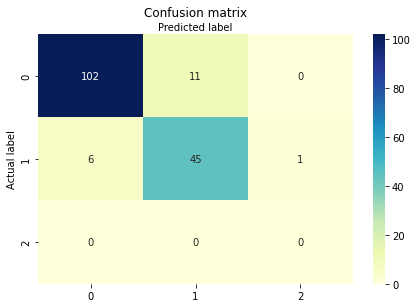

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = splt.subplots()
tick_marks = np.arange(len(class_names))
splt.xticks(tick_marks, class_names)
splt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, preds.round())), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
splt.tight_layout()
splt.title('Confusion matrix', y=1.1)
splt.ylabel('Actual label')
splt.xlabel('Predicted label')
splt.show()